In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
%pip install bertopic
%pip install germansentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from bertopic import BERTopic
from germansentiment import SentimentModel

from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
topic_model = BERTopic.load('gdrive/MyDrive/mathesis/topic_model_bertopic_2010')

In [6]:
df = pd.read_pickle('gdrive/MyDrive/mathesis/df_ml_ready_2010.pkl')

In [7]:
topic_df = pd.read_pickle('gdrive/MyDrive/mathesis/df_topic_2010.pkl')

In [8]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674069 entries, 0 to 674068
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   window_id                674069 non-null  int64         
 1   paragraph_id             674069 non-null  int64         
 2   item_of_business         674069 non-null  object        
 3   person_id                596150 non-null  object        
 4   first_name               596150 non-null  object        
 5   last_name                596150 non-null  object        
 6   council                  596150 non-null  object        
 7   party                    596150 non-null  object        
 8   in_admin_role            674069 non-null  bool          
 9   text                     674069 non-null  object        
 10  date                     674069 non-null  datetime64[ns]
 11  session_title            674069 non-null  object        
 12  session_id      

In [9]:
sent_df = topic_df[(topic_df['person_id'].notnull()) & (topic_df['Topic'] > 0)][['window_id', 'sentences_window']].reset_index(drop=True)

In [10]:
sent_df

,window_id,sentences_window
0,135,Ich spreche nur zur Dringlichkeit. Weihnachten...
1,136,"Weihnachten ist vorbei, das neue Jahr hat bego..."
2,187,"Zürcher Hauseigentümer, die ihr eigenes Haus o..."
3,190,Der Kanton Zürich betritt mit dieser exorbitan...
4,191,Zum Vergleich: Der Kanton Thurgau erhöht den E...
...,...,...
180246,673953,"Sie alle wissen, dass die ZKB voll an der Rekr..."
180247,673954,Dass der Bankratspräsident heute im Kantonsrat...
180248,673957,Wir haben Ihre Voten gehört und nehmen sie ern...
180249,673958,Inhaltlich wurde unsere Meinung im Eingangsvot...


In [11]:
docs = list(sent_df['sentences_window'])

In [12]:
model = SentimentModel('mdraw/german-news-sentiment-bert')

In [13]:
BATCH_SIZE = 50
probabilities = []
for i in tqdm(range(0, len(docs), BATCH_SIZE)):
  probabilities += model.predict_sentiment(docs[i:i + BATCH_SIZE], output_probabilities = True)[1]

100%|██████████| 3606/3606 [34:13<00:00,  1.76it/s]


In [14]:
probabilities[:5]

[[['positive', 0.014055043458938599],
  ['negative', 0.9786675572395325],
  ['neutral', 0.007277345284819603]],
 [['positive', 0.04068167507648468],
  ['negative', 0.9143924713134766],
  ['neutral', 0.04492587223649025]],
 [['positive', 0.12183469533920288],
  ['negative', 0.4294915497303009],
  ['neutral', 0.4486737847328186]],
 [['positive', 0.04454011470079422],
  ['negative', 0.02443208172917366],
  ['neutral', 0.9310278296470642]],
 [['positive', 0.08835164457559586],
  ['negative', 0.10054314881563187],
  ['neutral', 0.8111051917076111]]]

In [15]:
single_probs = []
for i in probabilities:
  single_probs.append(i[0][1] - i[1][1])
single_probs[:5]

[-0.9646125137805939,
 -0.8737107962369919,
 -0.307656854391098,
 0.02010803297162056,
 -0.01219150424003601]

In [16]:
sent_df['sentiment'] = single_probs

In [17]:
sent_df

,window_id,sentences_window,sentiment
0,135,Ich spreche nur zur Dringlichkeit. Weihnachten...,-0.964613
1,136,"Weihnachten ist vorbei, das neue Jahr hat bego...",-0.873711
2,187,"Zürcher Hauseigentümer, die ihr eigenes Haus o...",-0.307657
3,190,Der Kanton Zürich betritt mit dieser exorbitan...,0.020108
4,191,Zum Vergleich: Der Kanton Thurgau erhöht den E...,-0.012192
...,...,...,...
180246,673953,"Sie alle wissen, dass die ZKB voll an der Rekr...",-0.707700
180247,673954,Dass der Bankratspräsident heute im Kantonsrat...,-0.788669
180248,673957,Wir haben Ihre Voten gehört und nehmen sie ern...,0.590553
180249,673958,Inhaltlich wurde unsere Meinung im Eingangsvot...,0.406892


<Axes: >

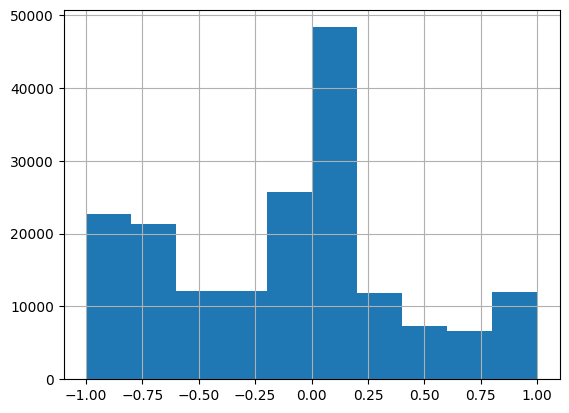

In [18]:
sent_df['sentiment'].hist()

In [19]:
sent_df['sentiment'].describe()

count    180251.000000
mean         -0.114015
std           0.511968
min          -0.999025
25%          -0.584931
50%          -0.004476
75%           0.133769
max           0.999569
Name: sentiment, dtype: float64

In [20]:
sent_df.to_pickle('gdrive/MyDrive/mathesis/df_sent_2010.pkl')

## Model evaluation

In [22]:
test_set = pd.read_pickle('gdrive/MyDrive/mathesis/sent_testset_balanced_2018.pkl')

In [23]:
test_set

,window_id,sentences_window,true_sentiment
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0
...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0


In [24]:
test_set = pd.merge(test_set, sent_df, how='inner', on='window_id')

In [25]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment
0,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,Die Rekurrenten verzichteten in der Folge auf ...,0.025792
1,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,"Sehr geehrter Herr Ratspräsident, würden Sie b...",-0.825540
2,66288,Die Milliardenvölker China und Indien sehen ni...,-1.0,Und das ist das Problem! Wer 2003 mit der S-Ba...,-0.919411
3,212282,"Ich weiss nicht, auf welchem Planeten Sie lebe...",-1.0,Eine weitere Zustimmung zur Staatsgarantie erf...,0.023541
4,94086,Auch wir Grünen erteilen dem rechtsbürgerliche...,-1.0,"Ein bisschen absurd daran ist, dass jede Ihrer...",0.834823
5,153387,"Ich spreche zu den KEF-Erklärungen Nummern 46,...",-1.0,"Wer diesen Weg beschreitet, möchte das Thema n...",-0.192612
6,70095,"Alle Welt spricht vom Klimawandel, und die Ant...",-1.0,Überfordert Sie der Kreuzzug der SVP gegen die...,-0.767986
7,93341,Dieser Missstand kann klar nicht hingenommen w...,-0.5,Auch die Finanzdirektorin wehrte sich entschie...,-0.529871
8,158241,"Nur sind wir aber nicht ganz sicher, wie gut d...",-0.5,"Schauen Sie nach, Sie finden die Informationen...",0.020213
9,151571,Zu erwähnen ist die stationäre Aufnahme- und V...,-0.5,Das andere ist zu EVP und CVP: Wenn Sie an Ihr...,0.066161


In [26]:
test_set['error'] = abs(test_set['true_sentiment'] - test_set['sentiment'])
test_set['error_sq'] = (test_set['true_sentiment'] - test_set['sentiment'])**2

In [27]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq
0,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,Die Rekurrenten verzichteten in der Folge auf ...,0.025792,1.025792,1.052249
1,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,"Sehr geehrter Herr Ratspräsident, würden Sie b...",-0.825540,0.174460,0.030436
2,66288,Die Milliardenvölker China und Indien sehen ni...,-1.0,Und das ist das Problem! Wer 2003 mit der S-Ba...,-0.919411,0.080589,0.006495
3,212282,"Ich weiss nicht, auf welchem Planeten Sie lebe...",-1.0,Eine weitere Zustimmung zur Staatsgarantie erf...,0.023541,1.023541,1.047636
4,94086,Auch wir Grünen erteilen dem rechtsbürgerliche...,-1.0,"Ein bisschen absurd daran ist, dass jede Ihrer...",0.834823,1.834823,3.366576
5,153387,"Ich spreche zu den KEF-Erklärungen Nummern 46,...",-1.0,"Wer diesen Weg beschreitet, möchte das Thema n...",-0.192612,0.807388,0.651875
6,70095,"Alle Welt spricht vom Klimawandel, und die Ant...",-1.0,Überfordert Sie der Kreuzzug der SVP gegen die...,-0.767986,0.232014,0.053830
7,93341,Dieser Missstand kann klar nicht hingenommen w...,-0.5,Auch die Finanzdirektorin wehrte sich entschie...,-0.529871,0.029871,0.000892
8,158241,"Nur sind wir aber nicht ganz sicher, wie gut d...",-0.5,"Schauen Sie nach, Sie finden die Informationen...",0.020213,0.520213,0.270622
9,151571,Zu erwähnen ist die stationäre Aufnahme- und V...,-0.5,Das andere ist zu EVP und CVP: Wenn Sie an Ihr...,0.066161,0.566161,0.320538


### Mean absolute error

In [28]:
test_set['error'].mean()

0.4982161696275903

### Mean squared error

In [29]:
test_set['error_sq'].mean()

0.3981887259219996

In [30]:
test_set.sort_values(by='error', ascending=False)

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq
4,94086,Auch wir Grünen erteilen dem rechtsbürgerliche...,-1.0,"Ein bisschen absurd daran ist, dass jede Ihrer...",0.834823,1.834823,3.366576
0,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,Die Rekurrenten verzichteten in der Folge auf ...,0.025792,1.025792,1.052249
3,212282,"Ich weiss nicht, auf welchem Planeten Sie lebe...",-1.0,Eine weitere Zustimmung zur Staatsgarantie erf...,0.023541,1.023541,1.047636
25,237921,Oder wenn das betreffende Regierungsmitglied ü...,0.5,Ich als ehemaliges Mitglied der Hundekommissio...,-0.405410,0.905410,0.819768
14,122332,"Jahrhundert verlangt natürlich, dass eigentlic...",0.0,Für die Jahre 2007 bis 2010 sind sie auf 32 Mi...,0.815092,0.815092,0.664375
5,153387,"Ich spreche zu den KEF-Erklärungen Nummern 46,...",-1.0,"Wer diesen Weg beschreitet, möchte das Thema n...",-0.192612,0.807388,0.651875
13,183413,Steht der neue Artikel in der Kantonsverfassun...,0.0,Ich will jetzt nicht eine Richtplan-Diskussion...,-0.685468,0.685468,0.469866
9,151571,Zu erwähnen ist die stationäre Aufnahme- und V...,-0.5,Das andere ist zu EVP und CVP: Wenn Sie an Ihr...,0.066161,0.566161,0.320538
11,158271,Hier hätte die Politik bei der Bewilligung der...,-0.5,Ich bin in bildungspolitischen Fragen selten g...,0.049575,0.549575,0.302032
8,158241,"Nur sind wir aber nicht ganz sicher, wie gut d...",-0.5,"Schauen Sie nach, Sie finden die Informationen...",0.020213,0.520213,0.270622


In [31]:
test_set['sentiment*2'] = test_set['sentiment']*2
test_set['sentiment_cat'] = test_set['sentiment*2'].round() / 2

In [32]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq,sentiment*2,sentiment_cat
0,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,Die Rekurrenten verzichteten in der Folge auf ...,0.025792,1.025792,1.052249,0.051584,0.0
1,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,"Sehr geehrter Herr Ratspräsident, würden Sie b...",-0.825540,0.174460,0.030436,-1.651080,-1.0
2,66288,Die Milliardenvölker China und Indien sehen ni...,-1.0,Und das ist das Problem! Wer 2003 mit der S-Ba...,-0.919411,0.080589,0.006495,-1.838822,-1.0
3,212282,"Ich weiss nicht, auf welchem Planeten Sie lebe...",-1.0,Eine weitere Zustimmung zur Staatsgarantie erf...,0.023541,1.023541,1.047636,0.047082,0.0
4,94086,Auch wir Grünen erteilen dem rechtsbürgerliche...,-1.0,"Ein bisschen absurd daran ist, dass jede Ihrer...",0.834823,1.834823,3.366576,1.669646,1.0
5,153387,"Ich spreche zu den KEF-Erklärungen Nummern 46,...",-1.0,"Wer diesen Weg beschreitet, möchte das Thema n...",-0.192612,0.807388,0.651875,-0.385224,-0.0
6,70095,"Alle Welt spricht vom Klimawandel, und die Ant...",-1.0,Überfordert Sie der Kreuzzug der SVP gegen die...,-0.767986,0.232014,0.053830,-1.535972,-1.0
7,93341,Dieser Missstand kann klar nicht hingenommen w...,-0.5,Auch die Finanzdirektorin wehrte sich entschie...,-0.529871,0.029871,0.000892,-1.059741,-0.5
8,158241,"Nur sind wir aber nicht ganz sicher, wie gut d...",-0.5,"Schauen Sie nach, Sie finden die Informationen...",0.020213,0.520213,0.270622,0.040427,0.0
9,151571,Zu erwähnen ist die stationäre Aufnahme- und V...,-0.5,Das andere ist zu EVP und CVP: Wenn Sie an Ihr...,0.066161,0.566161,0.320538,0.132322,0.0


In [33]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [34]:
confusion_matrix(test_set, 'true_sentiment', 'sentiment_cat')

sentiment_cat,-1.0,-0.5,0.0,0.5,1.0
true_sentiment,,,,,
-1.0,3,0,3,0,1
-0.5,1,1,4,0,0
0.0,0,1,2,2,1
0.5,0,1,5,2,0


In [35]:
test_set['true_sentiment_3'] = np.where(test_set['true_sentiment'] % 1 == 0.5, test_set['true_sentiment'] * 2, test_set['true_sentiment'])
test_set['sentiment_cat_3'] = np.where(test_set['sentiment_cat'] % 1 == 0.5, test_set['sentiment_cat'] * 2, test_set['sentiment_cat'])

In [36]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq,sentiment*2,sentiment_cat,true_sentiment_3,sentiment_cat_3
0,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0,Die Rekurrenten verzichteten in der Folge auf ...,0.025792,1.025792,1.052249,0.051584,0.0,-1.0,0.0
1,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,"Sehr geehrter Herr Ratspräsident, würden Sie b...",-0.825540,0.174460,0.030436,-1.651080,-1.0,-1.0,-1.0
2,66288,Die Milliardenvölker China und Indien sehen ni...,-1.0,Und das ist das Problem! Wer 2003 mit der S-Ba...,-0.919411,0.080589,0.006495,-1.838822,-1.0,-1.0,-1.0
3,212282,"Ich weiss nicht, auf welchem Planeten Sie lebe...",-1.0,Eine weitere Zustimmung zur Staatsgarantie erf...,0.023541,1.023541,1.047636,0.047082,0.0,-1.0,0.0
4,94086,Auch wir Grünen erteilen dem rechtsbürgerliche...,-1.0,"Ein bisschen absurd daran ist, dass jede Ihrer...",0.834823,1.834823,3.366576,1.669646,1.0,-1.0,1.0
5,153387,"Ich spreche zu den KEF-Erklärungen Nummern 46,...",-1.0,"Wer diesen Weg beschreitet, möchte das Thema n...",-0.192612,0.807388,0.651875,-0.385224,-0.0,-1.0,-0.0
6,70095,"Alle Welt spricht vom Klimawandel, und die Ant...",-1.0,Überfordert Sie der Kreuzzug der SVP gegen die...,-0.767986,0.232014,0.053830,-1.535972,-1.0,-1.0,-1.0
7,93341,Dieser Missstand kann klar nicht hingenommen w...,-0.5,Auch die Finanzdirektorin wehrte sich entschie...,-0.529871,0.029871,0.000892,-1.059741,-0.5,-1.0,-1.0
8,158241,"Nur sind wir aber nicht ganz sicher, wie gut d...",-0.5,"Schauen Sie nach, Sie finden die Informationen...",0.020213,0.520213,0.270622,0.040427,0.0,-1.0,0.0
9,151571,Zu erwähnen ist die stationäre Aufnahme- und V...,-0.5,Das andere ist zu EVP und CVP: Wenn Sie an Ihr...,0.066161,0.566161,0.320538,0.132322,0.0,-1.0,0.0


In [37]:
confusion_matrix(test_set, 'true_sentiment_3', 'sentiment_cat_3')

sentiment_cat_3,-1.0,0.0,1.0
true_sentiment_3,,,
-1.0,5,7,1
0.0,1,2,3
1.0,1,5,2
